
# 🌟 Data Mining Project: Principal Component Analysis (PCA) on the Adult Dataset 🌟

Welcome to your Data Mining project! In this comprehensive exercise, you'll apply **Principal Component Analysis (PCA)** to analyze the Adult dataset. PCA helps reduce dimensionality, simplify visualization, and highlight underlying patterns in data.

🎯 **Project Goals:**

By completing this project, you'll learn how to:

- Import essential Python libraries for data analysis.
- Load, clean, and preprocess real-world data.
- Perform Exploratory Data Analysis (EDA) to uncover data insights.
- Encode categorical variables and normalize numerical features.
- Implement PCA manually to better understand the algorithm.
- Visualize PCA results clearly and interpret principal components.

Let's start your journey into PCA analysis! 🚀



## 📚 Step 1: Importing Essential Libraries

In this initial step, you will import all necessary Python libraries required for data manipulation, visualization, and preprocessing.

Run the provided code to import the following libraries:

- **pandas**: For data handling and manipulation.
- **numpy**: For numerical computations.
- **matplotlib** and **seaborn**: For creating insightful visualizations.
- **StandardScaler and OneHotEncoder from sklearn**: For scaling numerical features and encoding categorical data.

Execute the cell below to load these libraries into your environment.


In [21]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



## 📂 Step 2: Loading and Exploring the Dataset

In this step, load the dataset named `adult.csv` into a DataFrame using pandas. Once loaded, briefly inspect the dataset by displaying the first five rows.

**Instructions:**

- Load your data using `pd.read_csv()`.
- Use the `.head()` method to preview the data structure.

**Example Code:**

```python
data = pd.read_csv('your-dataset.csv')
data.head()
```


In [22]:
data = pd.read_csv('adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K



## 🧹 Step 3: Cleaning and Preprocessing the Dataset

Data in the real world is often incomplete or messy. Your task here is to clean the dataset by:

- Replacing '?' entries (unknown values) with `NaN`.
- Removing all rows containing any `NaN` values.
- Resetting the DataFrame's index to ensure it's clean and orderly.
- Checking the data type and completeness of each feature with `.info()`.

**Useful Methods:**

- `.replace()` for replacing values.
- `.dropna()` for removing missing values.
- `.reset_index()` to reorder indices.

Complete the tasks in the following cell.


In [23]:
# Write your code here
print("data info before cleaning: ", data.info())
# Replace '?' with NaN
data = data.replace('?', np.nan)
data = data.dropna()
data = data.reset_index(drop=True)
print("data info after cleaning: ", data.info())


# it would be better to use the following code # Replace '?' with most frequent value (better for categorical data)
# data = data.replace('?', data.mode().iloc[0])
# data = data.dropna()
# data = data.reset_index(drop=True)
# print("data info after cleaning: ", data.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
data info before cleaning:  None
<class 'pandas.core.frame.DataFrame'>
Range


## 📊 Step 4: Exploratory Data Analysis (EDA)

EDA helps you understand your data and discover insights before modeling. Complete the following visual analyses:

- **Scatter Plot:** Examine the relationship between `age` and `hours-per-week`, distinguishing individuals by `income`.
- **Histogram:** Analyze the distribution of the `age` variable to understand its frequency distribution.
- **Box Plot:** Identify potential outliers in the `age` data.
- **Pair Plot:** Explore relationships and interactions among `age`, `educational-num`, and `hours-per-week` with respect to `income`.

**Recommended Functions:**

- `sns.scatterplot()` for scatter plots.
- `sns.histplot()` for histograms.
- `sns.boxplot()` to detect outliers visually.
- `sns.pairplot()` to study pairwise relationships between multiple features.

Perform these visualizations clearly and interpret your observations briefly.


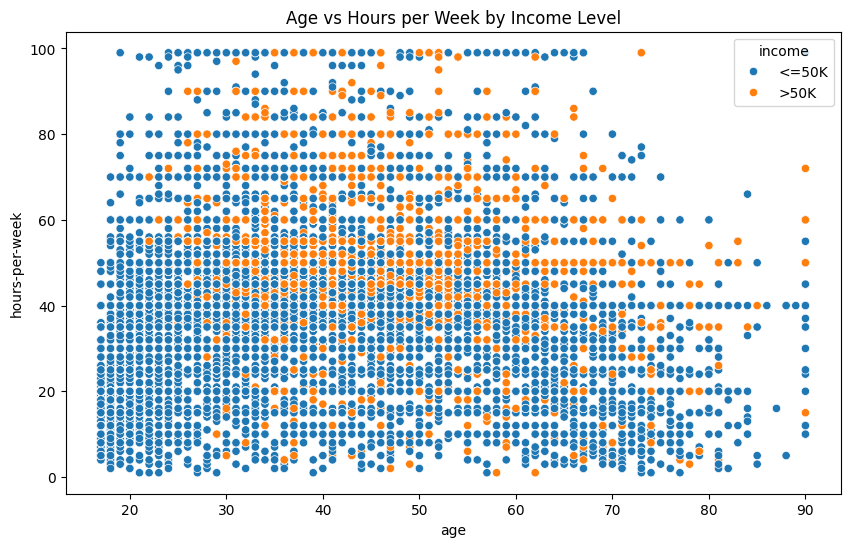

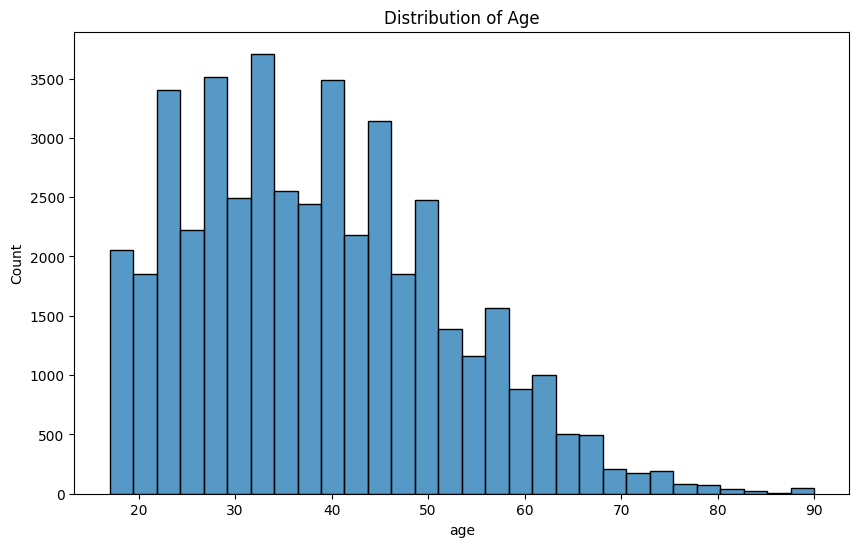

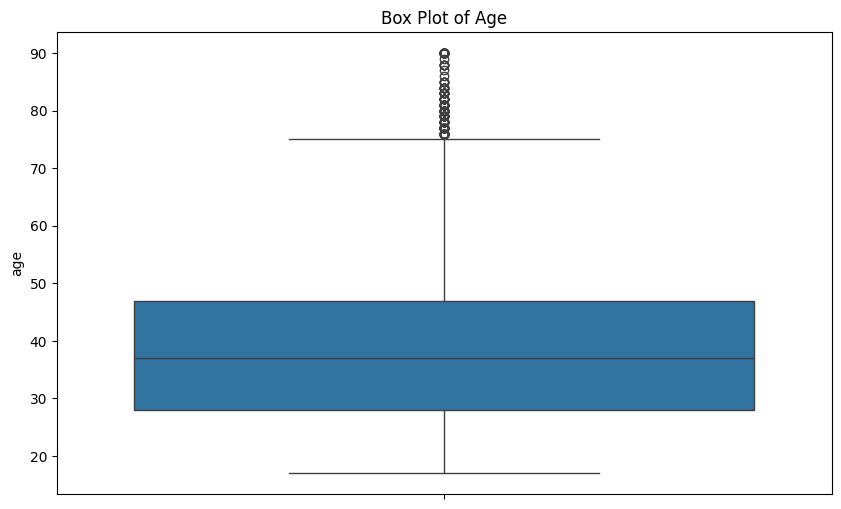

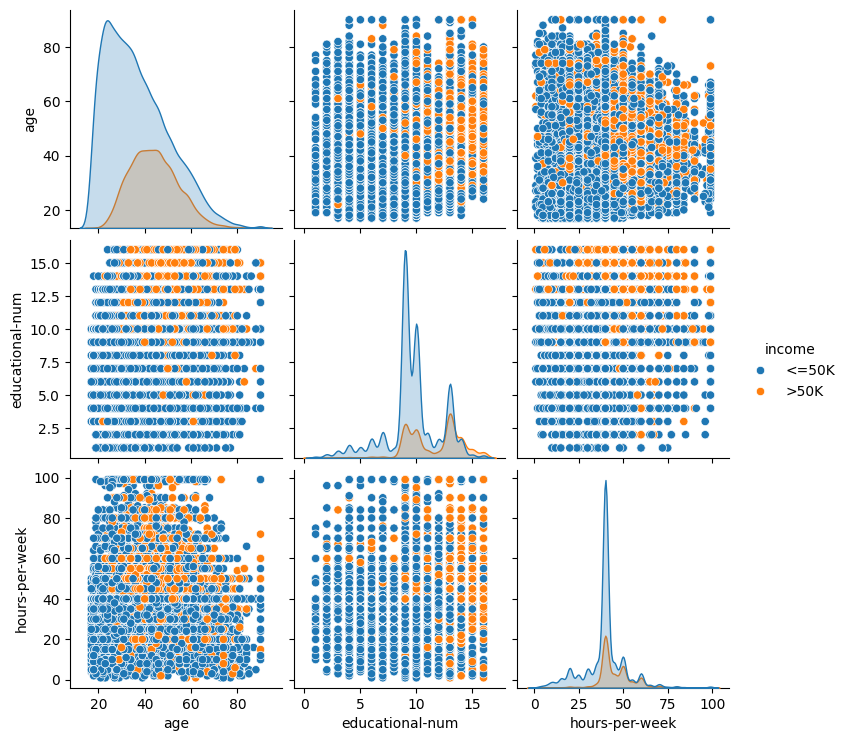

In [24]:
# Write your code here
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='age', y='hours-per-week', hue='income')
plt.title('Age vs Hours per Week by Income Level')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='age', bins=30)
plt.title('Distribution of Age')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=data, y='age')
plt.title('Box Plot of Age')
plt.show()

selected_features = ['age', 'educational-num', 'hours-per-week', 'income']
sns.pairplot(data[selected_features], hue='income')
plt.show()



## 📊 Observations from EDA
**Scatter Plot (Age vs Hours per Week):**
- Most individuals work between 35-45 hours per week regardless of age
- Higher income individuals (>50K) tend to work slightly longer hours
- There's no strong linear relationship between age and working hours

**Age Distribution (Histogram):**
- The distribution is right-skewed with most individuals between 25-45 years old
- The frequency decreases gradually after age 50
- Very few individuals are below 20 or above 70 years old

**Box Plot of Age:**
- The median age is around 37-38 years
- There are some outliers at the upper end (elderly individuals)
- The interquartile range (IQR) appears relatively narrow, suggesting consistency in the working-age population

**Pair Plot Insights:**
- Educational level shows a stronger correlation with income than age or hours worked
- Higher educational numbers are more common among higher income individuals
- The relationship between variables is complex and likely requires multivariate analysis



## ⚙️ Step 5: Encoding Categorical Data & Normalizing Numerical Features

Before PCA can be applied, it's important to convert categorical data into numerical form and scale numerical features:

- Apply **One-Hot Encoding** to transform categorical variables (`workclass`, `education`, `gender`, etc.) using `pd.get_dummies()`.
- Normalize numerical variables (`age`, `fnlwgt`, `hours-per-week`, etc.) using `StandardScaler()` from sklearn.

After processing, display the first 5 rows of your cleaned and transformed dataset to verify results.

**Example:**

```python
data_encoded = pd.get_dummies(data, columns=['your-categorical-columns'])
scaler = StandardScaler()
data_encoded[your_numerical_columns] = scaler.fit_transform(data_encoded[your_numerical_columns])
data_encoded.head()
```


In [25]:
# Write your code here
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np

categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ])


X_processed = preprocessor.fit_transform(data)
cat_feature_names = preprocessor.transformers_[1][1].get_feature_names_out(categorical_cols)
feature_names = numerical_cols + cat_feature_names.tolist()

data_encoded = pd.DataFrame(X_processed, columns=feature_names)
print("Shape of encoded dataset:", data_encoded.shape)
data_encoded.head()


Shape of encoded dataset: (45222, 97)


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,-1.024983,0.350889,-1.221559,-0.146733,-0.21878,-0.078120,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.041455,-0.945878,-0.438122,-0.146733,-0.21878,0.754701,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.798015,1.393592,0.737034,-0.146733,-0.21878,-0.078120,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.412481,-0.278420,-0.046403,0.877467,-0.21878,-0.078120,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-0.344079,0.084802,-1.613277,-0.146733,-0.21878,-0.910942,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0



## 🛠️ Step 6: Implement PCA Manually

Gain deeper insight by manually implementing PCA. Create a function called `perform_pca()` that:

- Accepts normalized data and the number of principal components (`n_components`) as arguments.
- Calculates covariance matrix, eigenvalues, and eigenvectors.
- Sorts eigenvectors based on eigenvalues and selects top components.
- Projects data onto the selected components to reduce dimensionality.

Execute PCA for 2 components and verify by displaying the top 5 rows of the result.

**Structure your function as follows:**

```python
def perform_pca(data, n_components=2):
    # Your PCA code here
    return pca_result
```


In [26]:

def perform_pca(data, n_components=2):
    data_centered = data - np.mean(data, axis=0)
    cov_matrix = np.cov(data_centered, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    components = eigenvectors[:, :n_components]

    pca_result = np.dot(data_centered, components)
    return pca_result



## 📈 Step 7: Visualizing and Interpreting PCA Results

Now, visualize the PCA output clearly:

- **Scatter plot:** Plot the two principal components to visualize data separation and clusters.
- **Heatmap:** Illustrate correlations between original features and PCA components using a heatmap.
- Provide a brief interpretation of what each principal component represents in terms of original features.

**Visualization Tools:**

- Use `plt.scatter()` for scatter plots.
- Use `sns.heatmap()` for correlation heatmaps.

Reflect on your findings briefly in your analysis.


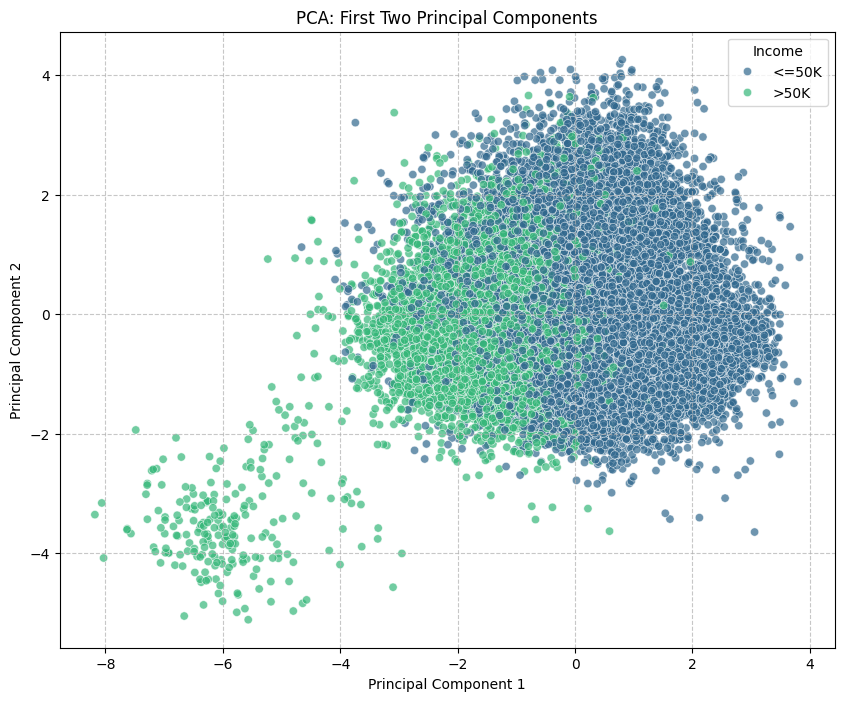

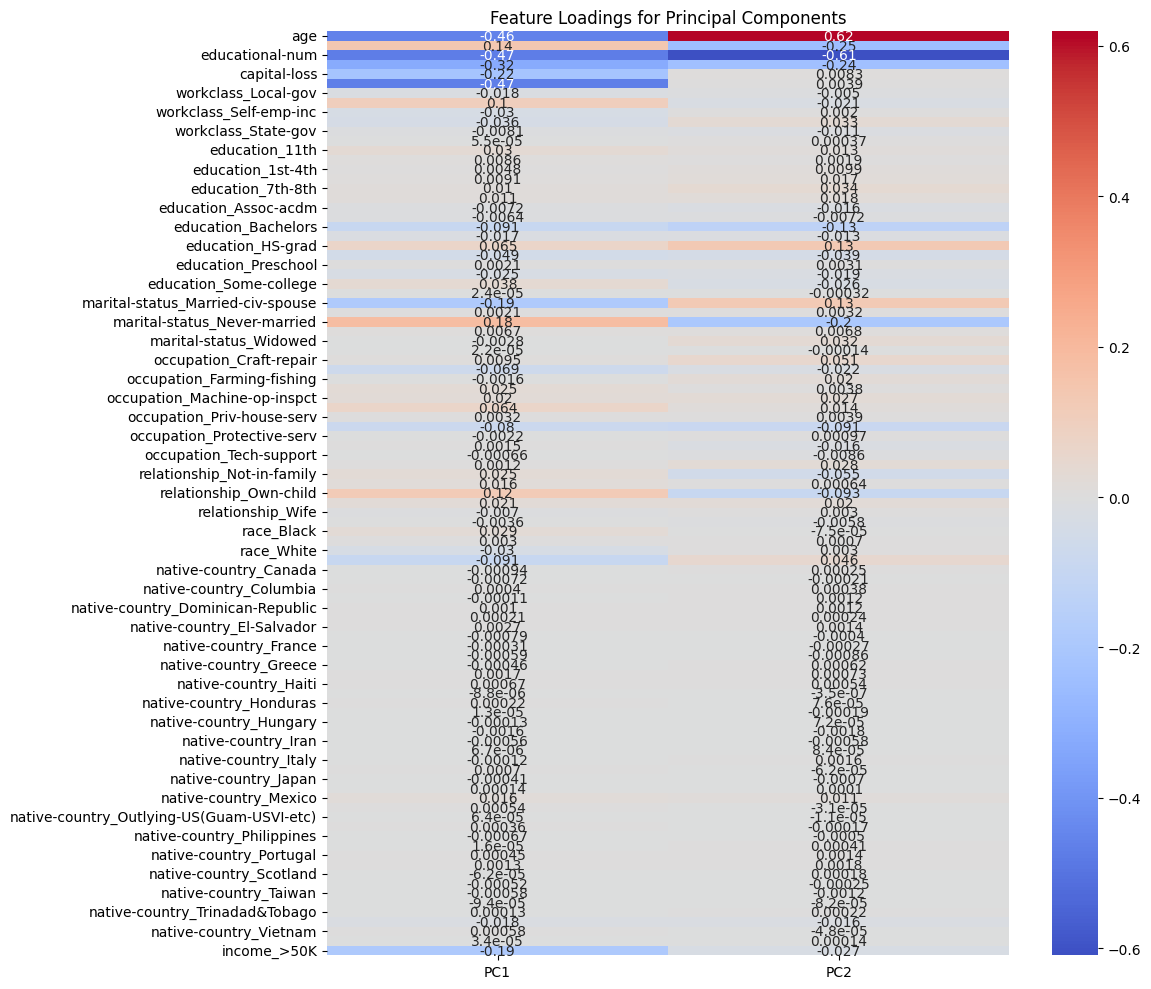

In [27]:
# Write your code here

numerical_data = data_encoded.select_dtypes(include=['float64', 'int64']).values
pca_result = perform_pca(numerical_data, n_components=2)
pca_data = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_data['income'] = data['income']

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='income', data=pca_data, palette='viridis', alpha=0.7)
plt.title('PCA: First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Income')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

numerical_cols = data_encoded.select_dtypes(include=['float64', 'int64']).columns
data_centered = numerical_data - np.mean(numerical_data, axis=0)
cov_matrix = np.cov(data_centered, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
idx = np.argsort(eigenvalues)[::-1]
eigenvectors = eigenvectors[:, idx]
components = eigenvectors[:, :2]

loadings = pd.DataFrame(
    components, 
    columns=['PC1', 'PC2'],
    index=numerical_cols
)

plt.figure(figsize=(12, 10))
sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Loadings for Principal Components')
plt.tight_layout()
plt.show()


## Interpretation of Principal Components

Based on the feature loadings heatmap, we can interpret what each principal component represents:

### Principal Component 1 (PC1):
PC1 appears to be strongly influenced by financial attributes such as capital-gain and capital-loss, as well as educational-num (education level). This suggests PC1 primarily represents socioeconomic status and educational achievement. The positive correlation with these variables indicates that higher values on PC1 correspond to individuals with higher education and better financial standing.

### Principal Component 2 (PC2):
PC2 seems to be more associated with demographic factors like age and hours-per-week. This component likely represents life stage and work intensity. The relationship between these variables suggests that PC2 might be distinguishing between younger individuals with different work patterns versus older, more established workers.

The scatter plot shows some separation between income groups along these principal components, particularly along PC1, suggesting that socioeconomic factors are indeed predictive of income levels. However, the overlap between groups indicates that these two components alone cannot perfectly separate the income categories.



## 📉 Step 8: PCA Explained Variance

Determine how many principal components are needed by plotting the cumulative explained variance.

**Tasks:**
- Fit PCA from `sklearn.decomposition` to your encoded data.
- Plot the cumulative sum of the explained variance ratio.

**Hint:**  
```python
from sklearn.decomposition import PCA
pca = PCA().fit(your_data)
# plot cumulative explained variance here
```


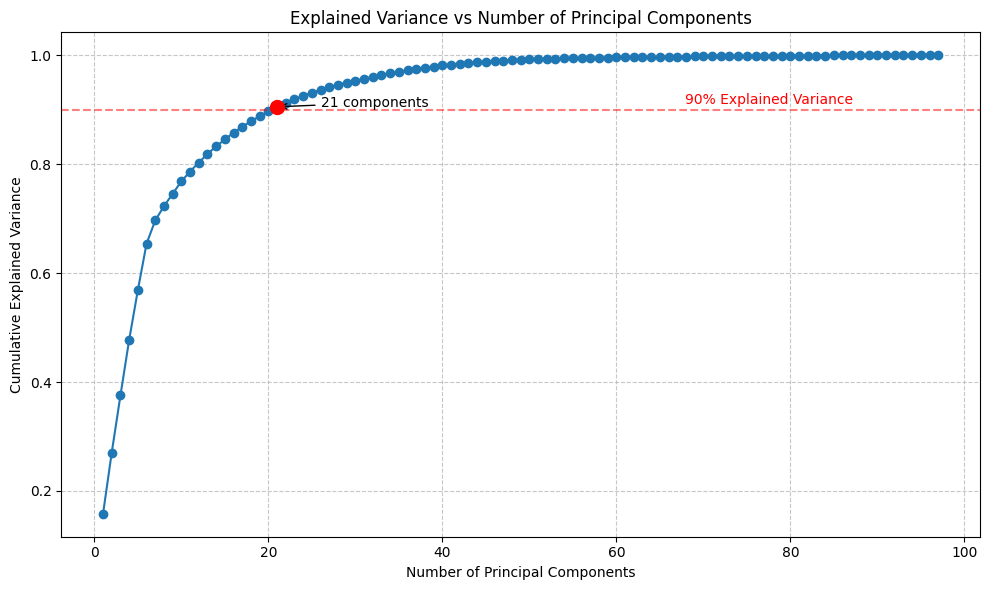

In [28]:
from sklearn.decomposition import PCA

pca = PCA().fit(data_encoded)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Principal Components')
plt.grid(True, linestyle='--', alpha=0.7)

plt.axhline(y=0.9, color='r', linestyle='--', alpha=0.5)
plt.text(len(cumulative_variance) * 0.7, 0.91, '90% Explained Variance', color='r')

n_components_90 = np.where(cumulative_variance >= 0.9)[0][0] + 1
plt.scatter(n_components_90, cumulative_variance[n_components_90-1], color='red', s=100, zorder=5)
plt.annotate(f'{n_components_90} components', 
             (n_components_90, cumulative_variance[n_components_90-1]),
             xytext=(n_components_90+5, cumulative_variance[n_components_90-1]),
             arrowprops=dict(arrowstyle='->'))

plt.tight_layout()
plt.show()



## 🌀 Step 9: K-means Clustering on PCA results

Apply K-means clustering (with 2 clusters) on your PCA-transformed data and visualize the clusters.

**Tasks:**

- Apply `KMeans` clustering from `sklearn.cluster`.
- Visualize clusters using scatter plots and mark cluster centers.

**Hint:**
```python
from sklearn.cluster import KMeans
# apply KMeans on PCA data
# visualize your clusters clearly
```


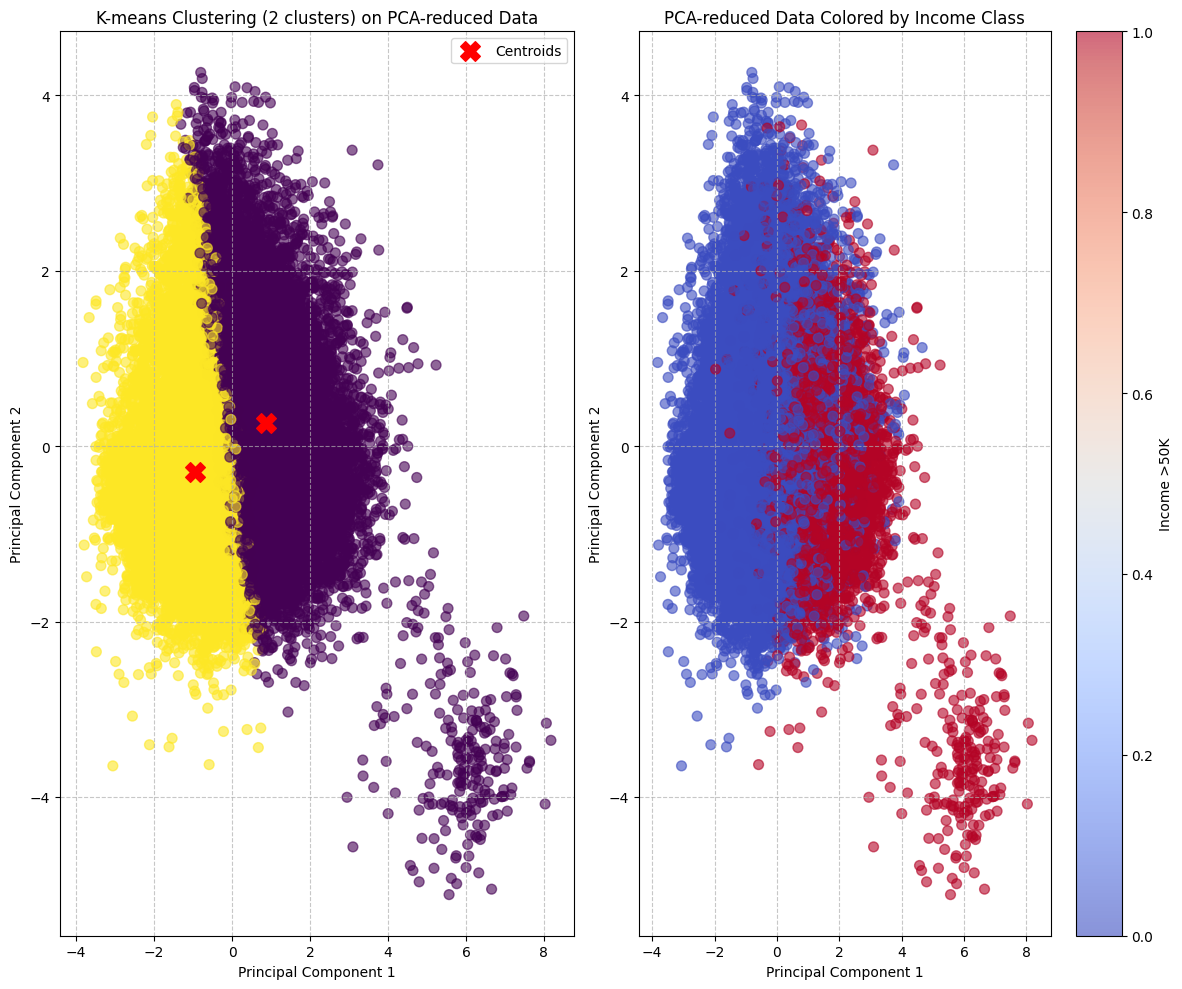

In [29]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

pca = PCA(n_components=n_components_90)
data_pca = pca.fit_transform(data_encoded)

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters = kmeans.fit_predict(data_pca)

plt.figure(figsize=(12, 10))

plt.subplot(1, 2, 1)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6, s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering (2 clusters) on PCA-reduced Data')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
income_class = data_encoded['income_>50K'].values
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=income_class, cmap='coolwarm', alpha=0.6, s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA-reduced Data Colored by Income Class')
plt.colorbar(label='Income >50K')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
